In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['farxiga'].value_counts()

0    361702
1      3711
Name: farxiga, dtype: int64

In [6]:
farxiga = cinci_1320[(cinci_1320['farxiga']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
farxiga['farxiga'].value_counts()

1    3453
Name: farxiga, dtype: int64

In [8]:
farxiga['Change_Type'].value_counts()

UNCHANGED    3453
Name: Change_Type, dtype: int64

In [9]:
farxiga['farx_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(farxiga['farxiga'], farxiga['Number_of_Payments_Included_in_Total_Amount'], farxiga['Total_Amount_of_Payment_USDollars'])]

#Ben Peck helped me with this during office hours.  I was oh-so-close but not quite there!

In [10]:
farxiga['farx_dollars'].sum()

179826.00999999998

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'xarelto', 'invokana', 'victoza', 'humira', 'levemir',
'entresto', 'chantix', 'myrbetriq', 'toujeo']

In [12]:
farxiga.drop(columns = drop_cols, inplace = True)

In [13]:
farxiga['z_score'] = [ ((i - farxiga['farx_dollars'].mean())/farxiga['farx_dollars'].std()) for i in farxiga['farx_dollars']]

In [14]:
farxiga.shape

(3453, 13)

In [15]:
farxigab = farxiga[(np.abs(farxiga['z_score']) < 3)].copy()

In [16]:
farxigab.shape

(3403, 13)

In [17]:
farxiga_wkly = farxigab.resample('w').sum()

In [18]:
farxiga_wkly.head()

,farxiga,farx_dollars,z_score
Date_of_Payment,,,
2014-02-09,2,20.80,-0.294390
2014-02-16,18,240.87,-2.459965
2014-02-23,23,292.21,-3.198271
2014-03-02,16,319.30,-1.815124
2014-03-09,15,205.25,-2.033990


In [19]:
farxiga_wkly.sort_index()

,farxiga,farx_dollars,z_score
Date_of_Payment,,,
2014-02-09,2,20.80,-0.294390
2014-02-16,18,240.87,-2.459965
2014-02-23,23,292.21,-3.198271
2014-03-02,16,319.30,-1.815124
2014-03-09,15,205.25,-2.033990
...,...,...,...
2020-11-22,8,317.42,-0.350365
2020-11-29,3,38.96,-0.414179
2020-12-06,7,95.38,-0.950620


Look at some plots

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

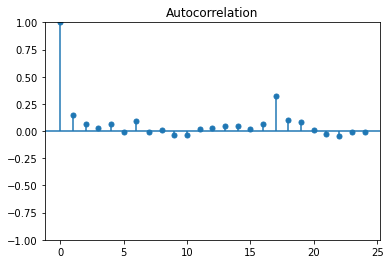

In [21]:
plot_acf(farxiga_wkly['farx_dollars'], alpha=None, lags=24);

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


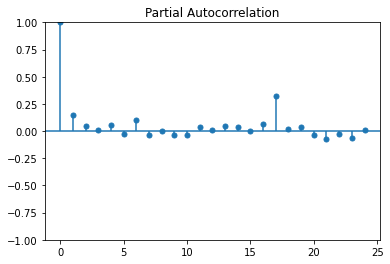

In [22]:
plot_pacf(farxiga_wkly['farx_dollars'], alpha=None, lags=24);

Adding 1 to the weekly sales for each observation so that Holt_winters will work.

In [23]:
farxiga_wkly['farx_dollars'] = [i+1 for i in farxiga_wkly['farx_dollars']]

Set up Train and Test Sets using 2013 - 2020 Data

In [24]:
train = farxiga_wkly.loc[:'2019-12-31']
train

,farxiga,farx_dollars,z_score
Date_of_Payment,,,
2014-02-09,2,21.80,-0.294390
2014-02-16,18,241.87,-2.459965
2014-02-23,23,293.21,-3.198271
2014-03-02,16,320.30,-1.815124
2014-03-09,15,206.25,-2.033990
...,...,...,...
2019-12-01,10,127.20,-1.393547
2019-12-08,23,878.61,-1.130811
2019-12-15,22,273.31,-3.084628


In [25]:
train['farx_dollars'].max()

2134.57

In [26]:
train.describe()

,farxiga,farx_dollars,z_score
count,308.000000,308.000000,308.000000
mean,9.545455,172.476688,-1.150041
std,6.592455,208.010075,0.914518
min,0.000000,1.000000,-5.405446
25%,4.000000,56.707500,-1.671554
50%,9.000000,118.890000,-1.088438
75%,14.000000,207.555000,-0.530026
max,34.000000,2134.570000,2.569170


In [27]:
train.index.freq = 'W' 

In [28]:
train.shape

(308, 3)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2014-02-09 to 2019-12-29
Freq: W-SUN
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   farxiga       308 non-null    int64  
 1   farx_dollars  308 non-null    float64
 2   z_score       308 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.6 KB


In [30]:
train.index

DatetimeIndex(['2014-02-09', '2014-02-16', '2014-02-23', '2014-03-02',
               '2014-03-09', '2014-03-16', '2014-03-23', '2014-03-30',
               '2014-04-06', '2014-04-13',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=308, freq='W-SUN')

In [31]:
test = farxiga_wkly.loc['2020-01-01':]
test

,farxiga,farx_dollars,z_score
Date_of_Payment,,,
2020-01-05,4,49.55,-0.564235
2020-01-12,12,141.07,-1.712412
2020-01-19,15,179.65,-2.127933
2020-01-26,15,658.86,-0.435505
2020-02-02,24,1003.74,-0.872814
2020-02-09,21,463.14,-2.230279
2020-02-16,11,138.73,-1.536751
2020-02-23,15,190.49,-2.089650
2020-03-01,15,360.40,-1.489578


In [32]:
test.describe()

,farxiga,farx_dollars,z_score
count,51.000000,51.000000,51.000000
mean,9.078431,357.467647,-0.410810
std,6.118311,868.315583,2.643462
min,0.000000,1.000000,-2.461490
25%,5.000000,63.180000,-1.267571
50%,8.000000,136.730000,-0.721887
75%,12.000000,282.645000,-0.369028
max,24.000000,5907.570000,16.813917


In [33]:
test.shape

(51, 3)

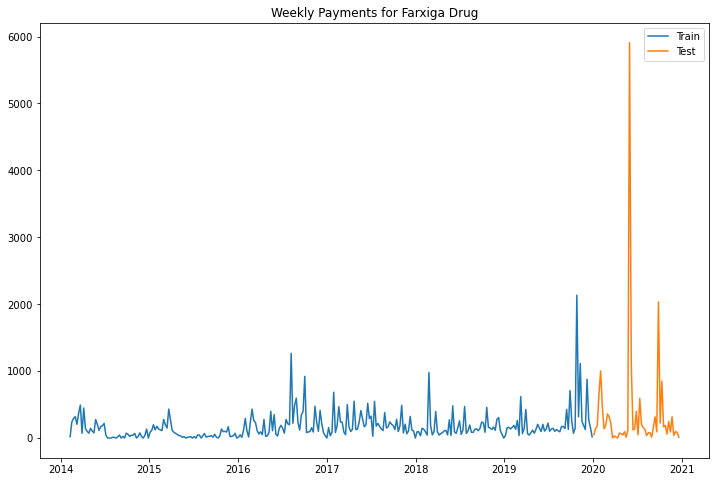

In [34]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Weekly Payments for Farxiga Drug");

Baseline (Naive Model)

In [35]:
df_preds = test.copy(deep=True)
df_preds

,farxiga,farx_dollars,z_score
Date_of_Payment,,,
2020-01-05,4,49.55,-0.564235
2020-01-12,12,141.07,-1.712412
2020-01-19,15,179.65,-2.127933
2020-01-26,15,658.86,-0.435505
2020-02-02,24,1003.74,-0.872814
2020-02-09,21,463.14,-2.230279
2020-02-16,11,138.73,-1.536751
2020-02-23,15,190.49,-2.089650
2020-03-01,15,360.40,-1.489578


In [36]:
df_preds['simple_mean'] = train['farx_dollars'].mean()
df_preds

,farxiga,farx_dollars,z_score,simple_mean
Date_of_Payment,,,,
2020-01-05,4,49.55,-0.564235,172.476688
2020-01-12,12,141.07,-1.712412,172.476688
2020-01-19,15,179.65,-2.127933,172.476688
2020-01-26,15,658.86,-0.435505,172.476688
2020-02-02,24,1003.74,-0.872814,172.476688
2020-02-09,21,463.14,-2.230279,172.476688
2020-02-16,11,138.73,-1.536751,172.476688
2020-02-23,15,190.49,-2.089650,172.476688
2020-03-01,15,360.40,-1.489578,172.476688


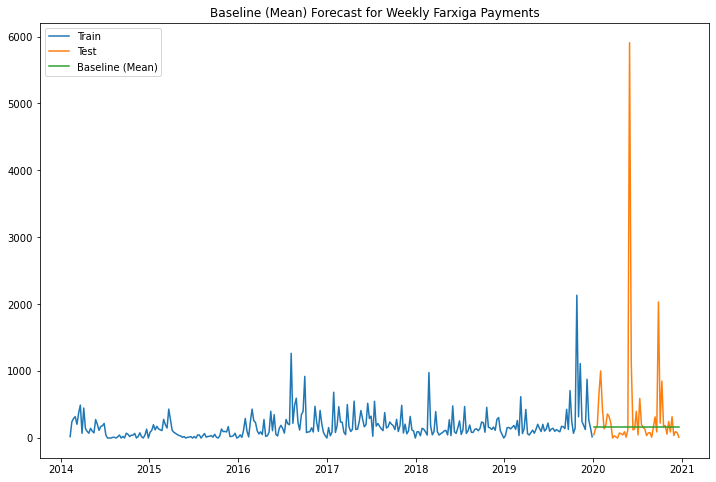

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Weekly Farxiga Payments");

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['simple_mean'], squared=False))

MAE for Simple Mean Baseline Model: 299.98301120448184
RMSE for Simple Mean Baseline Model: 879.4372303459356


Make a Seasonal Baseline Model with shift of 7

In [40]:
df_preds['seasonal_7'] = train['farx_dollars'].shift(7, freq='W-SUN') 
df_preds.head(2)

,farxiga,farx_dollars,z_score,simple_mean,seasonal_7
Date_of_Payment,,,,,
2020-01-05,4,49.55,-0.564235,172.476688,250.21
2020-01-12,12,141.07,-1.712412,172.476688,186.70


In [41]:
df_preds['seasonal_7'].fillna(0, inplace=True)

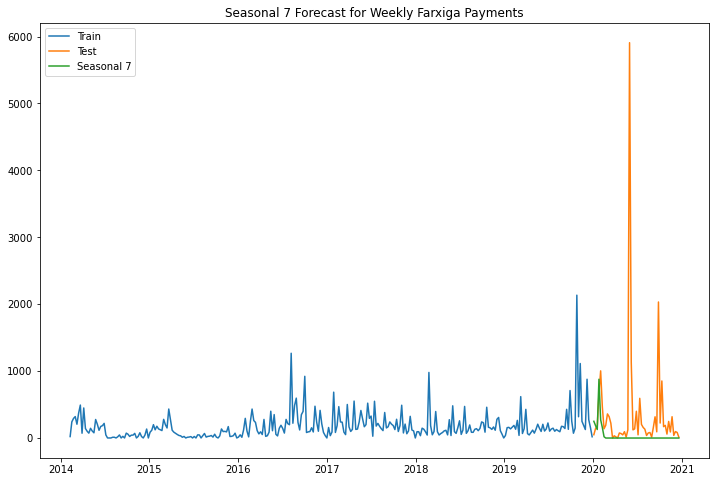

In [42]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_7'], label='Seasonal 7')

plt.legend(loc='best')
plt.title("Seasonal 7 Forecast for Weekly Farxiga Payments");

In [43]:
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['seasonal_7'], squared=False))

MAE for Seasonal Baseline 7 Shift Model: 338.6490196078432
RMSE for Seasonal Baseline 7 Shift Model: 920.5788610604594


Seasonal Baseline Model with shift of 52

In [44]:
df_preds['seasonal_52'] = train['farx_dollars'].shift(52, freq='W-SUN') 
df_preds.head(2)

,farxiga,farx_dollars,z_score,simple_mean,seasonal_7,seasonal_52
Date_of_Payment,,,,,,
2020-01-05,4,49.55,-0.564235,172.476688,250.21,37.50
2020-01-12,12,141.07,-1.712412,172.476688,186.70,154.88


In [45]:
df_preds['seasonal_52'].fillna(0, inplace=True)

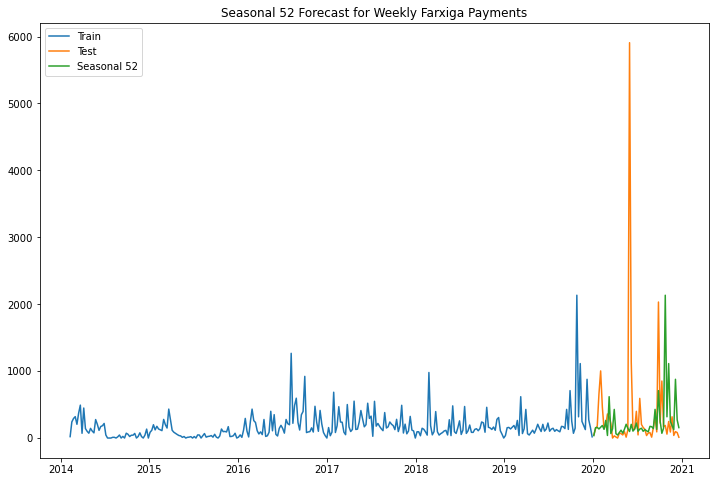

In [46]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal 52')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Weekly Farxiga Payments");

In [47]:
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['seasonal_52'], squared=False))

MAE for Seasonal Baseline 52 Shift Model: 358.6549019607843
RMSE for Seasonal Baseline 52 Shift Model: 929.794281487187


Simple Exponential Smoothing Model

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [49]:
ses = SimpleExpSmoothing(train['farx_dollars']).fit(smoothing_level=.5)

In [50]:
ses.summary()

Dep. Variable:,farx_dollars,No. Observations:,308
Model:,SimpleExpSmoothing,SSE,14587081.619
Optimized:,True,AIC,3319.789
Trend:,None,BIC,3327.249
Seasonal:,None,AICC,3319.921
Seasonal Periods:,None,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,13:05:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,145.55141,l.0,True


In [51]:
ses_forecast = ses.forecast(len(test))

In [52]:
df_preds['ses'] = ses_forecast

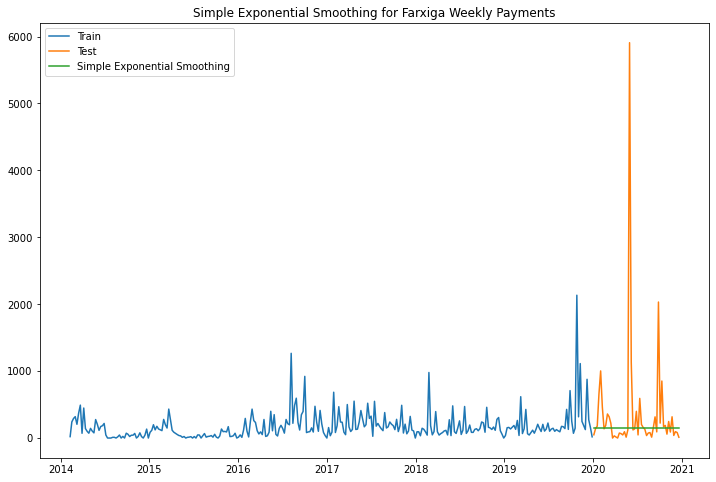

In [53]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Farxiga Weekly Payments");

In [54]:
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['ses'], squared=False))

MAE for Simple Exponential Smoothing Model: 297.03065616913636
RMSE for Simple Exponential Smoothing Model: 883.5309150515187


Holt-Winters Multiplicative Model with Seasonality of 52

In [55]:
hw_m52 = ExponentialSmoothing(
    train['farx_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [56]:
hw_m52.summary()

Dep. Variable:,farx_dollars,No. Observations:,308
Model:,ExponentialSmoothing,SSE,9194051.734
Optimized:,True,AIC,3285.622
Trend:,Multiplicative,BIC,3494.508
Seasonal:,Multiplicative,AICC,3313.108
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,13:05:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1464303,alpha,True
smoothing_trend,0.0001003,beta,True


In [57]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

,farxiga,farx_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52
Date_of_Payment,,,,,,,,
2020-01-05,4,49.55,-0.564235,172.476688,250.21,37.50,153.902693,194.157380
2020-01-12,12,141.07,-1.712412,172.476688,186.70,154.88,153.902693,213.228222


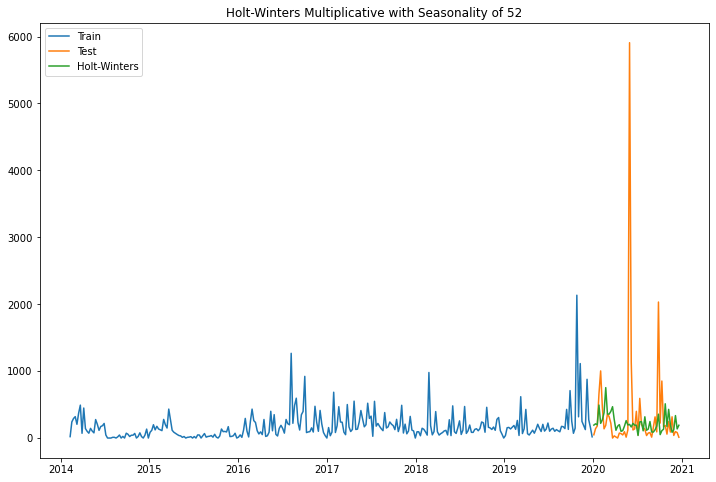

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [59]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['hw_m52'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 52 Model: 324.7812774027749
RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model: 874.474542954938


Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [60]:
hw_a52 = ExponentialSmoothing(
    train['farx_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

In [61]:
hw_a52.summary()

Dep. Variable:,farx_dollars,No. Observations:,308
Model:,ExponentialSmoothing,SSE,10201212.300
Optimized:,True,AIC,3317.639
Trend:,Additive,BIC,3526.524
Seasonal:,Additive,AICC,3345.124
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,13:05:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1471781,alpha,True
smoothing_trend,0.0007217,beta,True


In [62]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

,farxiga,farx_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52
Date_of_Payment,,,,,,,,,
2020-01-05,4,49.55,-0.564235,172.476688,250.21,37.50,153.902693,194.157380,366.901356
2020-01-12,12,141.07,-1.712412,172.476688,186.70,154.88,153.902693,213.228222,360.897808


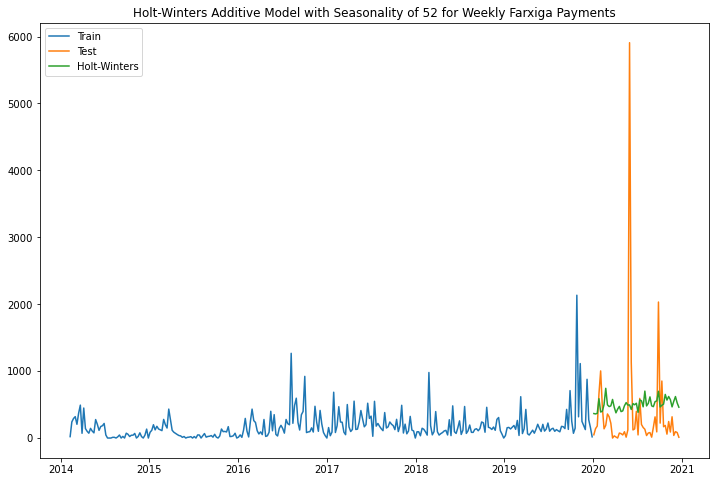

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Weekly Farxiga Payments");

In [64]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['hw_a52'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 485.1436096485845
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 872.0057735423044


Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [65]:
hw_a7 = ExponentialSmoothing(
    train['farx_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

In [66]:
hw_a7.summary()

Dep. Variable:,farx_dollars,No. Observations:,308
Model:,ExponentialSmoothing,SSE,12688117.602
Optimized:,True,AIC,3294.832
Trend:,Additive,BIC,3335.863
Seasonal:,Additive,AICC,3296.070
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,13:05:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1513642,alpha,True
smoothing_trend,0.0418954,beta,True


In [67]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

,farxiga,farx_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7
Date_of_Payment,,,,,,,,,,
2020-01-05,4,49.55,-0.564235,172.476688,250.21,37.50,153.902693,194.157380,366.901356,367.027108
2020-01-12,12,141.07,-1.712412,172.476688,186.70,154.88,153.902693,213.228222,360.897808,423.188227


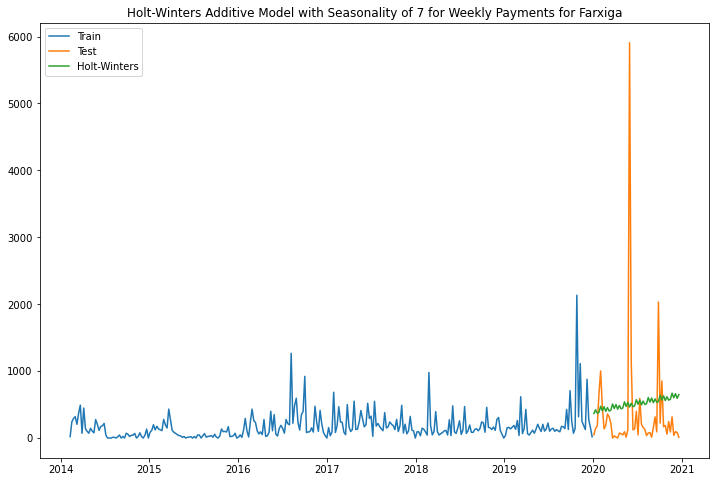

In [68]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Weekly Payments for Farxiga");

In [69]:
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['hw_a7'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 7 Model: 500.13662372247006
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 884.4613987500873


Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [70]:
hw_m7 = ExponentialSmoothing(
    train['farx_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

In [71]:
hw_m7.summary()

Dep. Variable:,farx_dollars,No. Observations:,308
Model:,ExponentialSmoothing,SSE,12638052.318
Optimized:,True,AIC,3293.614
Trend:,Multiplicative,BIC,3334.645
Seasonal:,Multiplicative,AICC,3294.852
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,13:05:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0108163,beta,True


In [72]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

,farxiga,farx_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7,hw_m7
Date_of_Payment,,,,,,,,,,,
2020-01-05,4,49.55,-0.564235,172.476688,250.21,37.50,153.902693,194.157380,366.901356,367.027108,339.982171
2020-01-12,12,141.07,-1.712412,172.476688,186.70,154.88,153.902693,213.228222,360.897808,423.188227,510.317221


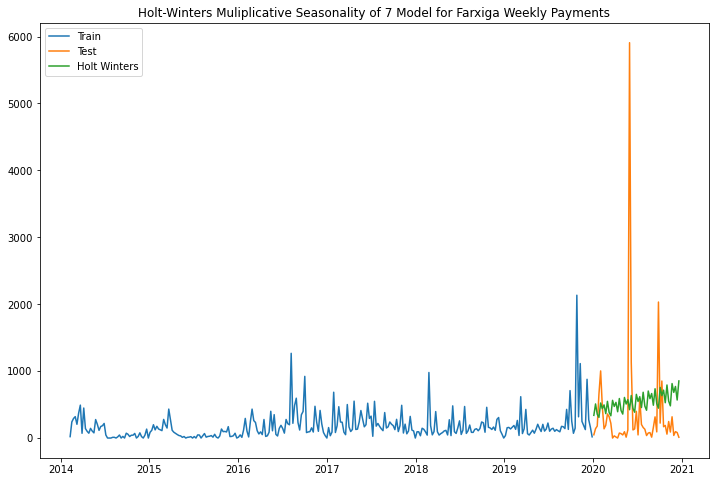

In [73]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['farx_dollars'], label='Train')
plt.plot(test.index, test['farx_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Farxiga Weekly Payments");

In [74]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['hw_m7'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 523.871807203199
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 907.3178172597297


Try a SARIMA Model

In [75]:
from pmdarima.utils import tsdisplay

In [76]:
traina = train['farx_dollars']

C:\Users\sarah\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


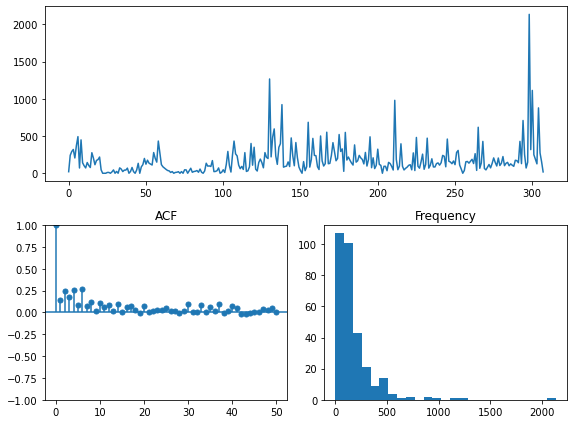

In [77]:
tsdisplay(traina)

In [78]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['farx_dollars'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=4128.131, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4318.194, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4207.827, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4128.133, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4316.194, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=4126.264, Time=0.65 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=4124.404, Time=0.32 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=4126.253, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=4122.610, Time=0.22 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=4124.362, Time=0.49 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=4124.373, Time=0.58 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=4126.246, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=4129.175, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=4128.987, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept

In [79]:
model_s7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  308
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2053.802
Date:                Mon, 14 Mar 2022   AIC                           4121.604
Time:                        13:05:39   BIC                           4147.691
Sample:                             0   HQIC                          4132.036
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5125      7.462      0.739      0.460      -9.112      20.137
ar.L1         -1.9406      0.039    -49.154      0.000      -2.018      -1.863
ar.L2         -0.9500      0.040    -23.625      0.000      -1.029      -0.871
ma.L1          1.0599      0.044     23.974      0.000       0.973       1.147
ma.L2         -0.7687      0.052    -14.762      0.000      -0.871      -0.667
ma.L3         -0.8640      0.043    -20.000      0.000      -0.949      -0.779
sigma2      3.767e+04   1963.982     19.179      0.000    3.38e+04    4.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             12629.95
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               7.58   Skew:                             4.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

array([571.02610322, 185.56017575, 586.14886423, 180.47082189,
       592.68393171, 183.6487788 , 591.33373178, 194.27497401,
       583.02045089, 211.33793137, 568.83088304, 233.68951967,
       549.9606391 , 260.10025889, 527.65982032, 289.31220541,
       503.18199942, 320.08771871, 477.73805157, 351.25272859,
       452.45605045, 381.73345744, 428.3481035 , 410.58589358,
       406.28466235, 437.01764516, 386.97651803, 460.40211904,
       370.96438985, 480.28525491, 358.61574759, 496.38529474,
       350.12827774, 508.58627542, 345.5392187 , 516.92609478,
       344.73965142, 521.58011663, 347.49273927, 522.84134949,
       353.45486536, 521.09825786, 362.19861163, 516.81124816,
       373.23656008, 510.48881834, 386.04496576, 502.66427592,
       400.08644847, 493.87382024, 414.83096939])

In [81]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

Date_of_Payment
2020-01-05    571.026103
2020-01-12    185.560176
Freq: W-SUN, Name: sarima7_auto, dtype: float64

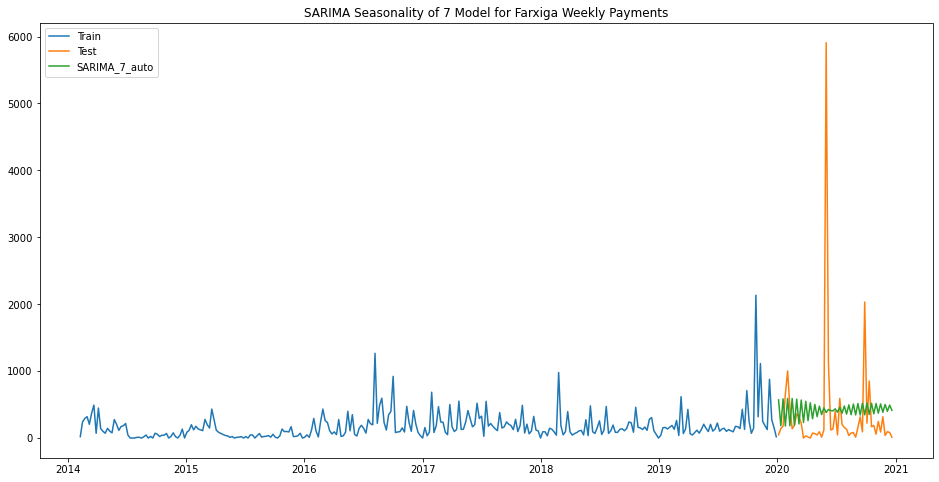

In [82]:
plt.figure(figsize=(16,8))
plt.plot(train['farx_dollars'], label='Train')
plt.plot(test['farx_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Farxiga Weekly Payments");

In [83]:
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['sarima7_auto'], squared=False))

MAE for SARIMA with Seasonality of 7 Model: 445.9098390756951
RMSE for SARIMA with Seasonality of 7 Model: 879.0231827168511


Try a SARIMA Model with m = 52

In [84]:
model_s52 = pmd.auto_arima(train['farx_dollars'], m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=7.83 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=4318.194, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=4206.836, Time=0.63 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=4129.141, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=4316.194, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=4128.332, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=4129.133, Time=1.83 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=3.78 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=4128.987, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=4129.175, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=4205.882, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=4122.610, Time=0.23 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=4122.878, Time=5.54 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=4122.950, Time=5.53 sec
 ARIMA(1,1,2)(1,0,1)[52] inte

In [85]:
model_s52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  308
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2053.802
Date:                Mon, 14 Mar 2022   AIC                           4121.604
Time:                        13:06:49   BIC                           4147.691
Sample:                             0   HQIC                          4132.036
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5125      7.462      0.739      0.460      -9.112      20.137
ar.L1         -1.9406      0.039    -49.154      0.000      -2.018      -1.863
ar.L2         -0.9500      0.040    -23.625      0.000      -1.029      -0.871
ma.L1          1.0599      0.044     23.974      0.000       0.973       1.147
ma.L2         -0.7687      0.052    -14.762      0.000      -0.871      -0.667
ma.L3         -0.8640      0.043    -20.000      0.000      -0.949      -0.779
sigma2      3.767e+04   1963.982     19.179      0.000    3.38e+04    4.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             12629.95
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               7.58   Skew:                             4.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

array([571.02610322, 185.56017575, 586.14886423, 180.47082189,
       592.68393171, 183.6487788 , 591.33373178, 194.27497401,
       583.02045089, 211.33793137, 568.83088304, 233.68951967,
       549.9606391 , 260.10025889, 527.65982032, 289.31220541,
       503.18199942, 320.08771871, 477.73805157, 351.25272859,
       452.45605045, 381.73345744, 428.3481035 , 410.58589358,
       406.28466235, 437.01764516, 386.97651803, 460.40211904,
       370.96438985, 480.28525491, 358.61574759, 496.38529474,
       350.12827774, 508.58627542, 345.5392187 , 516.92609478,
       344.73965142, 521.58011663, 347.49273927, 522.84134949,
       353.45486536, 521.09825786, 362.19861163, 516.81124816,
       373.23656008, 510.48881834, 386.04496576, 502.66427592,
       400.08644847, 493.87382024, 414.83096939])

In [87]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

Date_of_Payment
2020-01-05    571.026103
2020-01-12    185.560176
Freq: W-SUN, Name: sarima52_auto, dtype: float64

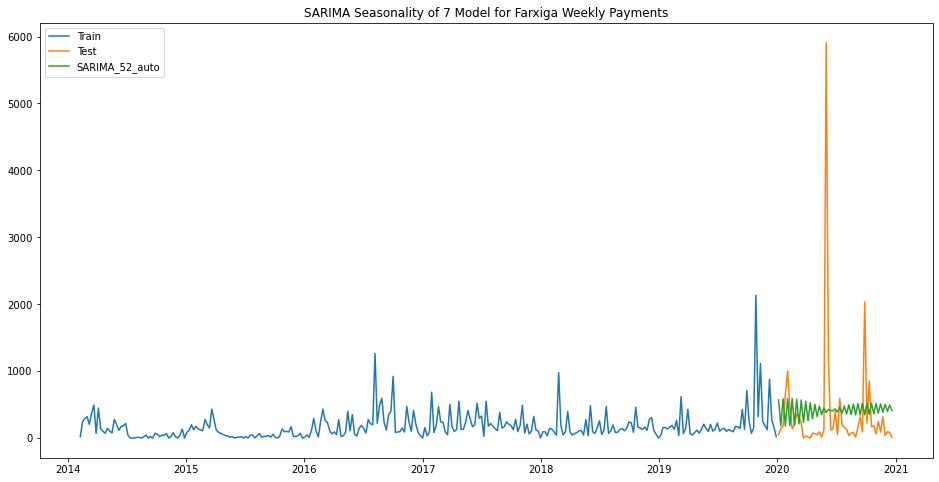

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['farx_dollars'], label='Train')
plt.plot(test['farx_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Farxiga Weekly Payments");

In [89]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['sarima52_auto']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['sarima52_auto'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 445.9098390756951
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 879.0231827168511


In [90]:
print("Summary of Metrics for Weekly Farxiga CMS Payments")
print("_________________________________________________")
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['simple_mean'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['seasonal_7'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['seasonal_52'], squared=False))
print("_________________________________________________")
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['ses'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['hw_m7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['hw_m52'], squared=False))
print("_________________________________________________")


Summary of Metrics for Weekly Farxiga CMS Payments
_________________________________________________
MAE for Simple Mean Baseline Model: 299.98301120448184
RMSE for Simple Mean Baseline Model: 879.4372303459356
_________________________________________________
MAE for Seasonal Baseline 7 Shift Model: 338.6490196078432
RMSE for Seasonal Baseline 7 Shift Model: 920.5788610604594
_________________________________________________
MAE for Seasonal Baseline 52 Shift Model: 358.6549019607843
RMSE for Seasonal Baseline 52 Shift Model: 929.794281487187
_________________________________________________
MAE for Simple Exponential Smoothing Model: 297.03065616913636
RMSE for Simple Exponential Smoothing Model: 883.5309150515187
_________________________________________________
MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 523.871807203199
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 907.3178172597297
_________________________________________________
MAE for 

In [91]:
print("Continued Summary of Metrics for Weeky Farxiga CMS Payments")
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['hw_a7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['hw_a52'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['sarima7_auto'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 52 Model:", mean_absolute_error(df_preds['farx_dollars'], df_preds['sarima52_auto']))
print("RMSE for SARIMA with Seasonality of 52 Model:", mean_squared_error(df_preds['farx_dollars'], df_preds['sarima52_auto'], squared=False))
print("_________________________________________________")

Continued Summary of Metrics for Weeky Farxiga CMS Payments
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 7 Model: 500.13662372247006
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 884.4613987500873
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 52 Model: 485.1436096485845
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 872.0057735423044
_________________________________________________
MAE for SARIMA with Seasonality of 7 Model: 445.9098390756951
RMSE for SARIMA with Seasonality of 7 Model: 879.0231827168511
_________________________________________________
MAE for SARIMA with Seasonality of 52 Model: 445.9098390756951
RMSE for SARIMA with Seasonality of 52 Model: 879.0231827168511
_________________________________________________
